<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/LSTM_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 

# Problem Statement
Create a text classifier that can help us disambiguate Spam/Ham

# Evaluation Metrics

# Import

In [34]:
import pandas as pd
import numpy as np

#Visualization
from matplotlib import pyplot as plt


#Classification Metrics
from sklearn.metrics import classification_report

#Random Module
import random

#Wordcloud
from wordcloud import WordCloud, STOPWORDS

#Read the dataset

In [2]:
sms_data = pd.read_csv("/content/drive/MyDrive/Case studies/spam.csv",encoding="ISO-8859-1")
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
sms_data['v1'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: v1, dtype: float64

In [5]:
sms_data = sms_data[['v1', 'v2']]
sms_data = sms_data.rename(columns={"v1":"Target","v2":"SMS"})
sms_data.head()

,Target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Baseline Model

In [7]:
y=sms_data['Target'].apply(lambda x: 1 if x.lower()=='spam' else 0)

In [11]:
#Create a model where everything is a "ham"
y_pred=np.zeros(len(y))
print("Baseline Model -1")
print(classification_report(y,y_pred))



Baseline Model -1
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4825
           1       0.00      0.00      0.00       747

    accuracy                           0.87      5572
   macro avg       0.43      0.50      0.46      5572
weighted avg       0.75      0.87      0.80      5572



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#Create a model where you randomly assign "spam" or "ham"
options=[1,0]
y_pred=random.choices(options,k=len(y))

print("Baseline Model -2")
print(classification_report(y,y_pred))

Baseline Model -2
              precision    recall  f1-score   support

           0       0.88      0.51      0.65      4825
           1       0.15      0.54      0.23       747

    accuracy                           0.52      5572
   macro avg       0.51      0.52      0.44      5572
weighted avg       0.78      0.52      0.59      5572



In [26]:
#Create a model where you randomly assign "spam" or "ham"
options=[1,0,0,0,0]
y_pred=random.choices(options,k=len(y))

print("Baseline Model -3")
print(classification_report(y,y_pred))

Baseline Model -3
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4825
           1       0.13      0.21      0.16       747

    accuracy                           0.71      5572
   macro avg       0.50      0.50      0.50      5572
weighted avg       0.77      0.71      0.74      5572



In [27]:
#Create a model where you randomly assign "spam" or "ham"
options=[1,1,1,1,0]
y_pred=random.choices(options,k=len(y))

print("Baseline Model -4")
print(classification_report(y,y_pred))

Baseline Model -4
              precision    recall  f1-score   support

           0       0.87      0.21      0.34      4825
           1       0.14      0.80      0.23       747

    accuracy                           0.29      5572
   macro avg       0.50      0.50      0.28      5572
weighted avg       0.77      0.29      0.32      5572



# Plot the Wordcloud

In [30]:
text=" ".join(sms_data['SMS'].apply(lambda x: x.lower()).tolist())


In [32]:
#Create a Wordcloud
wordcloud=WordCloud(max_words=100,background_color='white',stopwords=STOPWORDS).generate(text)

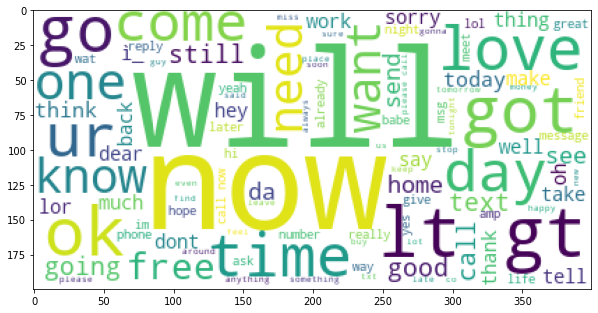

In [35]:
# Display the WC
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show()